In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data = pd.read_csv('/content/openb_pod_list_cpu0.csv')

In [3]:
# Verify dataset loading and examine columns
print(data.head())
print(data.columns)

             name  cpu_milli  memory_mib  num_gpu  gpu_milli  gpu_spec qos  \
0  openb-pod-0000      12000       16384        1       1000       NaN  LS   
1  openb-pod-0001       6000       12288        1        460       NaN  LS   
2  openb-pod-0002      12000       24576        1       1000       NaN  LS   
3  openb-pod-0003       6000       12288        1        460       NaN  LS   
4  openb-pod-0004      12000       16384        1       1000       NaN  LS   

  pod_phase  creation_time  deletion_time  scheduled_time  
0   Running              0       12537496             0.0  
1   Running         427061       12902960        427061.0  
2   Running        1558381       12902960       1558381.0  
3   Running        2690044       12902960       2690044.0  
4   Running        2758084       12902960       2758084.0  
Index(['name', 'cpu_milli', 'memory_mib', 'num_gpu', 'gpu_milli', 'gpu_spec',
       'qos', 'pod_phase', 'creation_time', 'deletion_time', 'scheduled_time'],
      dtype='

In [4]:

# Select features and target variable
X = data[['pod_phase']]  # Replace with relevant feature columns
y = data['cpu_milli']    # Replace with the target column

In [5]:
# One-hot encode categorical variables if needed
X = pd.get_dummies(X)

In [6]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [8]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [12]:
# Step 1: Evaluation Metrics
# Calculate various evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-squared Score: {r2}")

Evaluation Metrics:
Mean Squared Error (MSE): 53688623.199289605
Root Mean Squared Error (RMSE): 7327.2520906059735
Mean Absolute Error (MAE): 3732.829375624289
Mean Absolute Percentage Error (MAPE): 0.6191345592232238
R-squared Score: 0.04862289112369078


In [14]:
# Step 2: Cross-Validation
# Perform cross-validation to check the model's generalization performance
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:", cv_scores)
print("Average Cross-Validation R-squared Score:", np.mean(cv_scores))

Cross-Validation R-squared Scores: [ 0.09764296  0.01002211  0.08190129 -0.10825276  0.1258788 ]
Average Cross-Validation R-squared Score: 0.041438480452891314


In [15]:
# Step 3: Residual Analysis
# Calculate residuals
residuals = y_test - y_pred

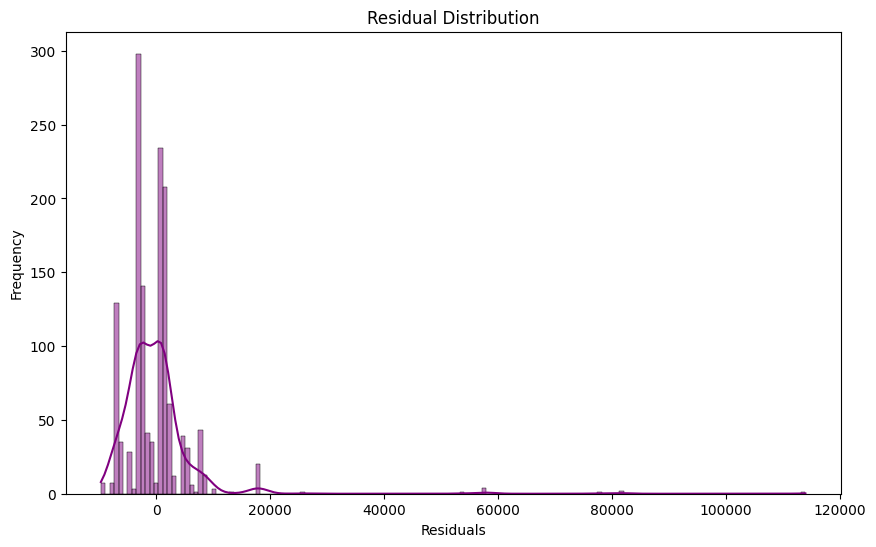

In [16]:
# Plot residual distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

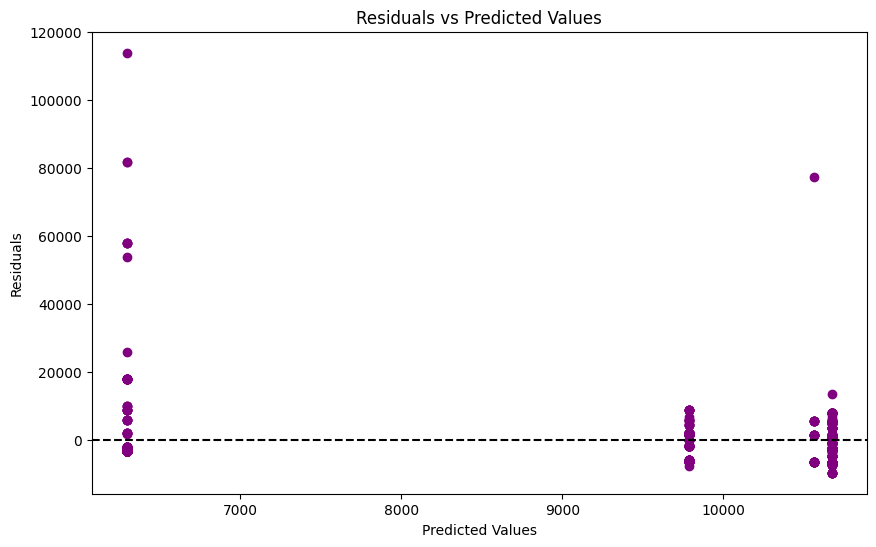

In [17]:
# Scatter plot of residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

<ipython-input-19-65fa4d7a795e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette="viridis")


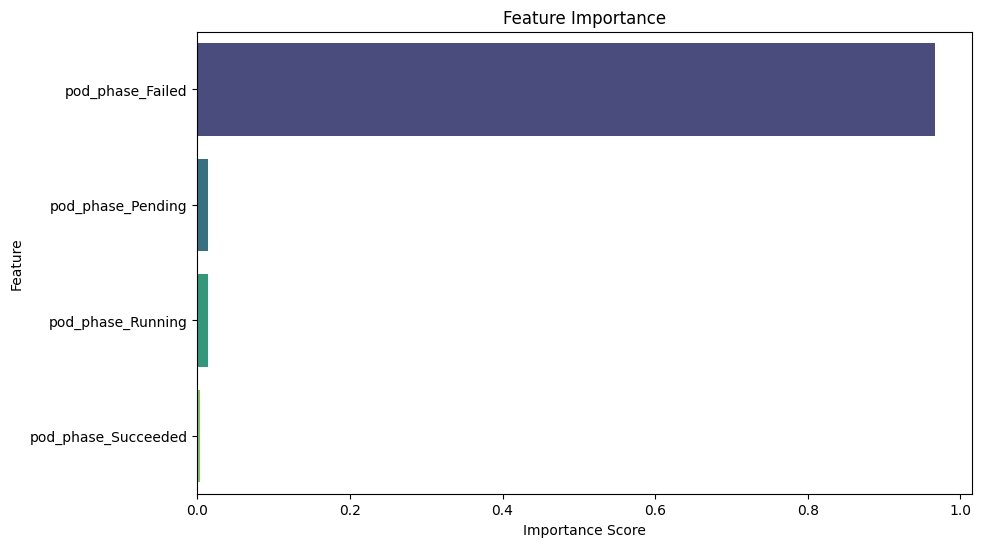

In [19]:
# Step 4: Feature Importance Analysis
# Visualize feature importance
feature_importances = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

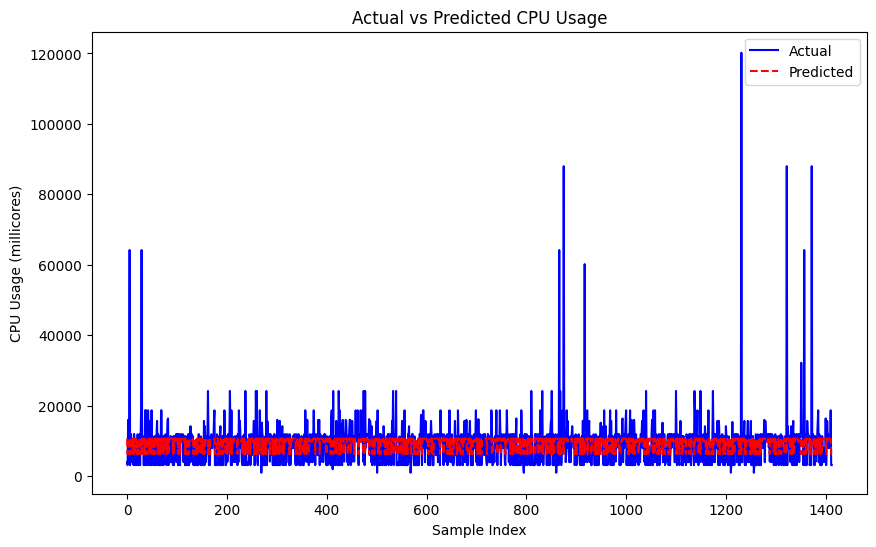

In [20]:
# Step 5: Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
plt.legend()
plt.title("Actual vs Predicted CPU Usage")
plt.xlabel("Sample Index")
plt.ylabel("CPU Usage (millicores)")
plt.show()